
<div style="background-color: #cce5ff; border-left: 5px solid #cce5ff; padding: 10px;">
    <h1 align="center">Deep Learning in Python</h1>
    <h2 align="center">NLP Disaster Tweets Kaggle Mini-Project</h2>
  
</div>

## Introduction



In natural disaster scenarios, prompt identification of critical information can save lives. Social media platforms, especially Twitter, are often used by people to share real-time updates. However, it is essential to distinguish between tweets that pertain to actual disasters and those that use disaster-related words metaphorically. This project aims to classify tweets into two categories: disaster or non-disaster, using a GRU-based neural network, LSTM and bidirectional LSTM. The dataset for this project is from Kaggle's "NLP with Disaster Tweets" competition, which provides labeled tweets for binary classification and can be found in the following link: https://www.kaggle.com/competitions/nlp-getting-started/data .


# Objective
The objective of the project is to create a model that accurately predicts whether a tweet is related to a disaster based on the tweet text. We will use a dataset containing tweets, where each tweet is labeled as a disaster tweet or not.

## Exploratory Data Analysis (EDA)

Before diving into model building, it's essential to understand the structure and characteristics of the data.

###  Data Overview

The dataset contains:

id: Unique identifier for each tweet.

text: The content of the tweet.

keyword: A keyword from the tweet.

location: Location of the tweet (if provided).

target: Label indicating whether the tweet is about a real disaster (1) or not (0).

In [3]:
import pandas as pd

df.train = pd.read_csv('train.csv')
df.test = pd.read_csv('test.csv')

# Display basic information and structure
df.train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df.train.tail()


,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
df.train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Id, text and target do not have missing values but Keyword and location have missing values. 

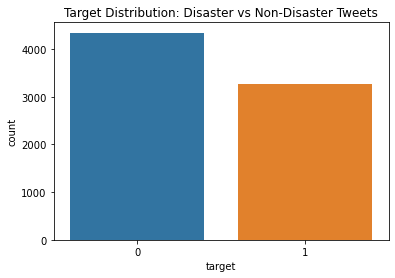

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=df.train)
plt.title('Target Distribution: Disaster vs Non-Disaster Tweets')
plt.show()

In [14]:
# Count the number of disaster and non-disaster tweets
tweet_counts = df.train['target'].value_counts()

# Display the counts
print("Non-Disaster Tweets (0):", tweet_counts[0])
print("Disaster Tweets (1):", tweet_counts[1])


Non-Disaster Tweets (0): 4342
Disaster Tweets (1): 3271


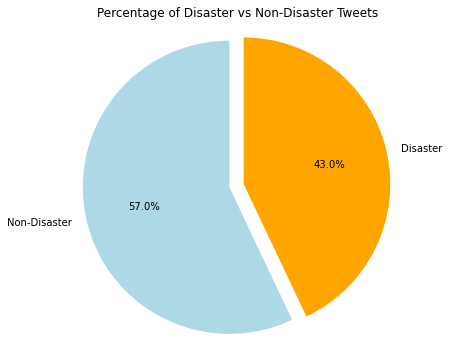

In [17]:
import matplotlib.pyplot as plt

# Count the number of disaster and non-disaster tweets
tweet_counts = df.train['target'].value_counts()

# Labels for the pie chart
labels = ['Non-Disaster', 'Disaster']

# Values for the pie chart
sizes = tweet_counts

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'], explode=(0, 0.1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Percentage of Disaster vs Non-Disaster Tweets')
plt.show()

3271 tweets are distaster tweets which is 43% of the data and 4342 are non disaster tweets which is 57% of the data.


### Word Counts
What is the most frequent keywords for disaster and non-disaster tweets?

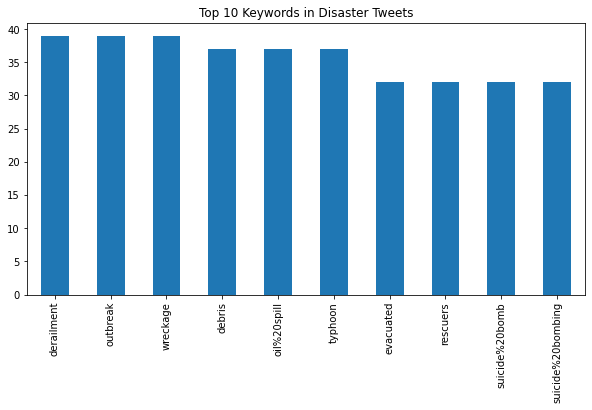

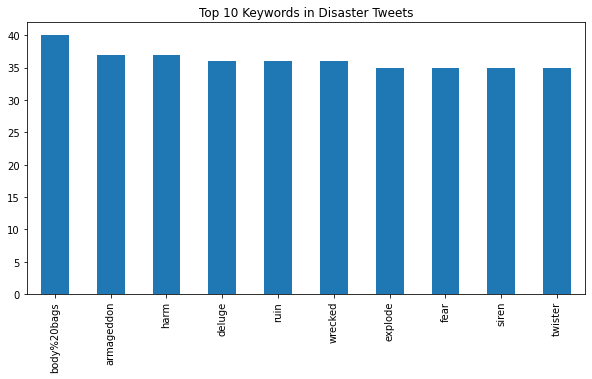

In [26]:
from collections import Counter

keyword_disaster = Counter(df.train[df.train['target'] == 1]['keyword'].dropna())
keyword_non_disaster = Counter(df.train[df.train['target'] == 0]['keyword'].dropna())

# Plot the most common keywords for disaster tweets
plt.figure(figsize=(10,5))
pd.Series(keyword_disaster).nlargest(10).plot(kind='bar')
plt.title('Top 10 Keywords in Disaster Tweets')
plt.show()

# Plot the most common keywords for disaster tweets
plt.figure(figsize=(10,5))
pd.Series(keyword_non_disaster).nlargest(10).plot(kind='bar')
plt.title('Top 10 Keywords in Disaster Tweets')
plt.show()

## Sentiment Analysis.

In [33]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 626.3/626.3 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 13.2 MB/s eta 0:00:00


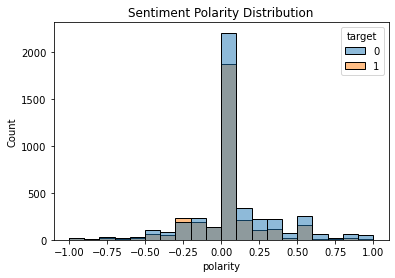

In [34]:
from textblob import TextBlob

df.train['polarity'] = df.train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(data=df.train, x='polarity', hue='target', bins=20)
plt.title('Sentiment Polarity Distribution')
plt.show()

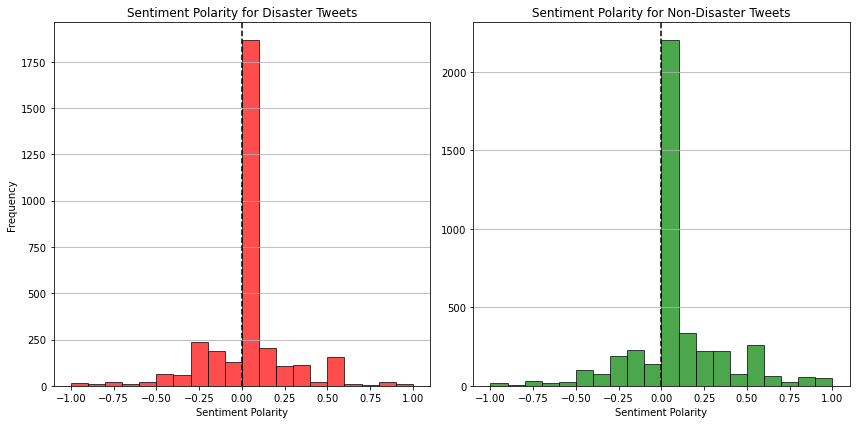

In [40]:


# Separate disaster and non-disaster tweets
disaster_tweets = df.train[df.train['target'] == 1]
non_disaster_tweets = df.train[df.train['target'] == 0]

# Plotting sentiment polarity distributions
plt.figure(figsize=(12, 6))

# Disaster Tweets
plt.subplot(1, 2, 1)
plt.hist(disaster_tweets['polarity'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Sentiment Polarity for Disaster Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.axvline(x=0, color='black', linestyle='--')  
plt.grid(axis='y')

# Non-Disaster Tweets
plt.subplot(1, 2, 2)
plt.hist(non_disaster_tweets['polarity'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Sentiment Polarity for Non-Disaster Tweets')
plt.xlabel('Sentiment Polarity')
plt.axvline(x=0, color='black', linestyle='--')  
plt.grid(axis='y')

plt.tight_layout()
plt.show()


The sentiment polarity plot for disaster tweets and non disaster tweets are almost distributed, indicating a mix of sentiments—positive, neutral, and negative.

 ### N-grams Analysis
Analyze the most common unigrams, bigrams, or trigrams in the tweets.

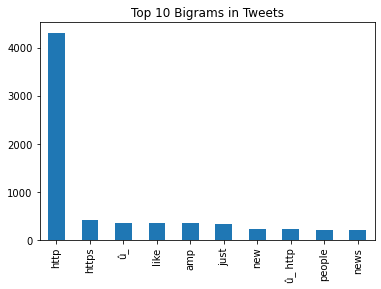

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
ngrams = vectorizer.fit_transform(df.train['text'])
ngram_df = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())
ngram_sum = ngram_df.sum().sort_values(ascending=False).head(10)

ngram_sum.plot(kind='bar')
plt.title('Top 10 Bigrams in Tweets')
plt.show()


Top 10 Unigrams:
http      4309
https      411
like       348
û_         348
amp        344
just       323
new        226
people     200
news       197
don        190
dtype: int64

Top 10 Bigrams:
û_ http                217
burning buildings       60
suicide bomber          59
youtube video           43
video http              42
liked youtube           42
northern california     41
cross body              40
oil spill               39
suicide bombing         36
dtype: int64

Top 10 Trigrams:
liked youtube video             42
suicide bomber detonated        30
northern california wildfire    29
pkk suicide bomber              28
latest homes razed              28
homes razed northern            28
bomber detonated bomb           28
razed northern california       27
16yr old pkk                    27
old pkk suicide                 27
dtype: int64


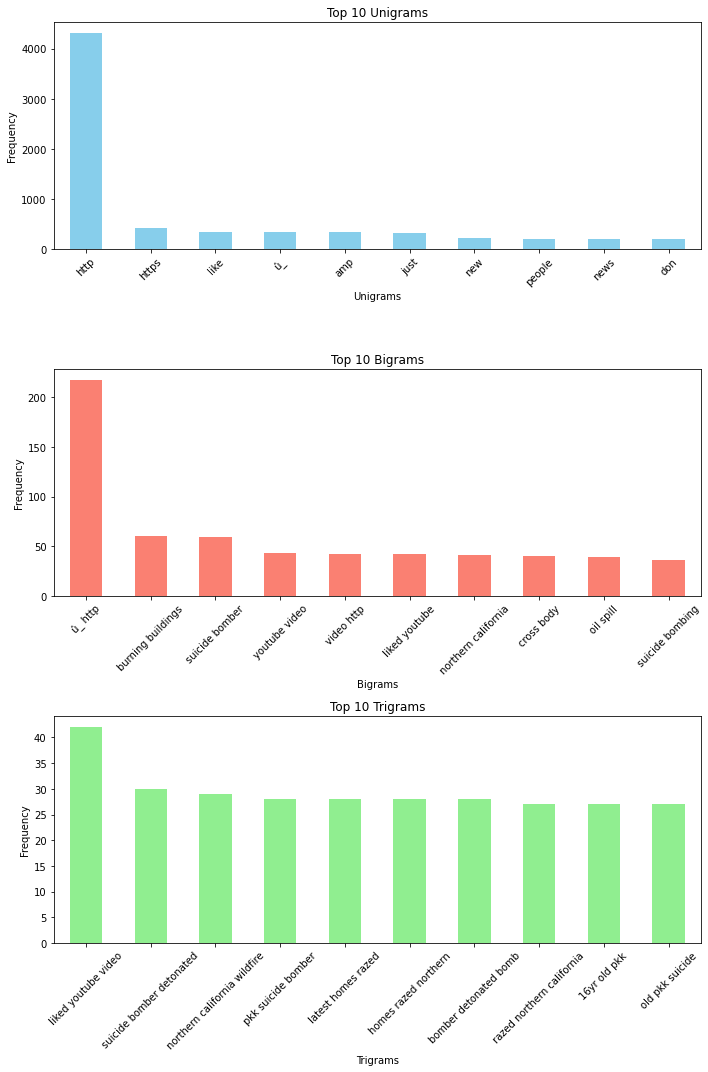

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer



# Function to get top n-grams
def get_top_ngrams(df, ngram_range, top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(df['text'])
    ngram_df = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())
    ngram_sum = ngram_df.sum().sort_values(ascending=False).head(top_n)
    return ngram_sum

# Get top 10 unigrams, bigrams, and trigrams
top_unigrams = get_top_ngrams(df.train, (1, 1))
top_bigrams = get_top_ngrams(df.train, (2, 2))
top_trigrams = get_top_ngrams(df.train, (3, 3))

# Print the results
print("Top 10 Unigrams:")
print(top_unigrams)
print("\nTop 10 Bigrams:")
print(top_bigrams)
print("\nTop 10 Trigrams:")
print(top_trigrams)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Unigrams
top_unigrams.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Unigrams')
axs[0].set_xlabel('Unigrams')
axs[0].set_ylabel('Frequency')
axs[0].set_xticklabels(top_unigrams.index, rotation=45)

# Bigrams
top_bigrams.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top 10 Bigrams')
axs[1].set_xlabel('Bigrams')
axs[1].set_ylabel('Frequency')
axs[1].set_xticklabels(top_bigrams.index, rotation=45)

# Trigrams
top_trigrams.plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Top 10 Trigrams')
axs[2].set_xlabel('Trigrams')
axs[2].set_ylabel('Frequency')
axs[2].set_xticklabels(top_trigrams.index, rotation=45)

plt.tight_layout()
plt.show()


### Top 10 N_gram of disaster tweets

Top 10 Disaster Unigrams:
http          2382
û_             172
news           140
amp            135
https          134
disaster       121
california     115
suicide        112
police         109
people         105
dtype: int64

Top 10 Disaster Bigrams:
û_ http                109
suicide bomber          59
northern california     41
oil spill               38
burning buildings       37
suicide bombing         35
california wildfire     34
70 years                30
bomber detonated        30
homes razed             29
dtype: int64

Top 10 DisasterTrigrams:
suicide bomber detonated        30
northern california wildfire    29
latest homes razed              28
bomber detonated bomb           28
homes razed northern            28
pkk suicide bomber              28
16yr old pkk                    27
razed northern california       27
old pkk suicide                 27
40 families affected            26
dtype: int64


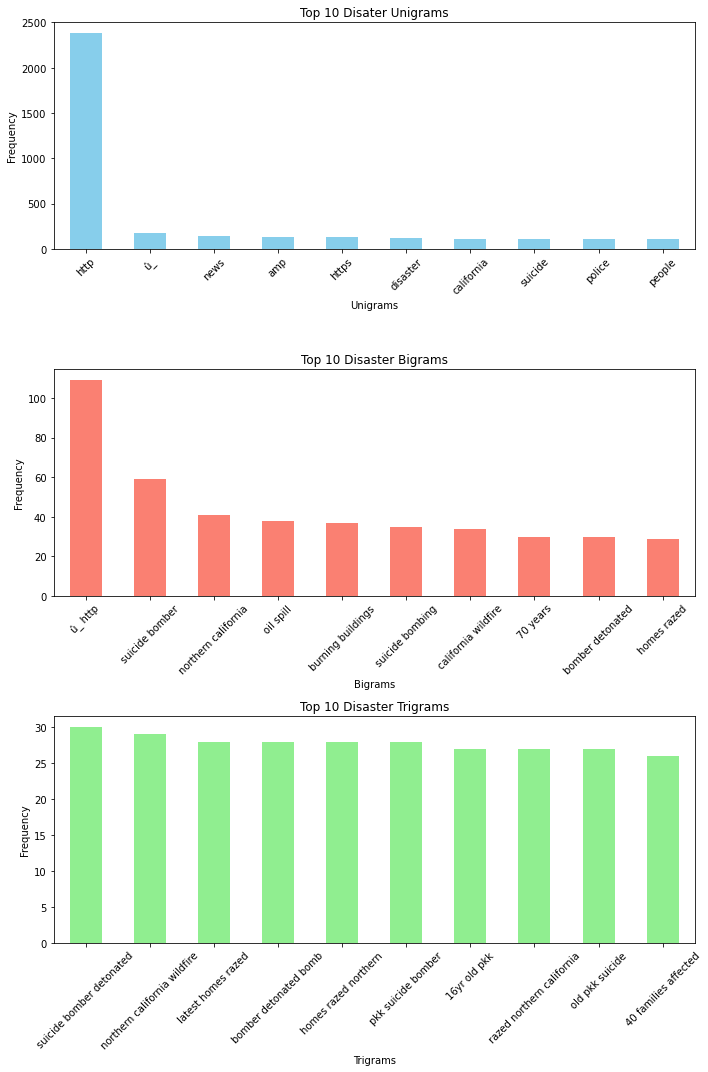

In [46]:


# Filter for disaster tweets
disaster_tweets_df = df.train[df.train['target'] == 1]

# Get top 10 unigrams, bigrams, and trigrams
top_unigrams = get_top_ngrams(disaster_tweets_df, (1, 1))
top_bigrams = get_top_ngrams(disaster_tweets_df, (2, 2))
top_trigrams = get_top_ngrams(disaster_tweets_df, (3, 3))

# Print the results
print("Top 10 Disaster Unigrams:")
print(top_unigrams)
print("\nTop 10 Disaster Bigrams:")
print(top_bigrams)
print("\nTop 10 DisasterTrigrams:")
print(top_trigrams)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Unigrams
top_unigrams.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Disaster Unigrams')
axs[0].set_xlabel('Unigrams')
axs[0].set_ylabel('Frequency')
axs[0].set_xticklabels(top_unigrams.index, rotation=45)

# Bigrams
top_bigrams.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top 10 Disaster Bigrams')
axs[1].set_xlabel('Bigrams')
axs[1].set_ylabel('Frequency')
axs[1].set_xticklabels(top_bigrams.index, rotation=45)

# Trigrams
top_trigrams.plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Top 10 Disaster Trigrams')
axs[2].set_xlabel('Trigrams')
axs[2].set_ylabel('Frequency')
axs[2].set_xticklabels(top_trigrams.index, rotation=45)

plt.tight_layout()
plt.show()


### Top 10 N_gram of Non disaster tweets

Top 10 Non Disaster Unigrams:
http     1927
https     277
like      254
just      234
amp       209
û_        176
new       170
don       138
body      116
video      96
dtype: int64

Top 10 Non Disaster Bigrams:
û_ http              108
cross body            39
youtube video         36
liked youtube         35
video http            27
body bag              27
gt gt                 26
û_ https              24
body bagging          24
burning buildings     23
dtype: int64

Top 10 Non DisasterTrigrams:
liked youtube video              35
reddit quarantine offensive      19
cross body bag                   19
youtube video http               19
quarantine offensive content     18
stock market crash               16
new content policy               16
reddit new content               16
subreddits banned quarantined    15
effect horrible subreddits       15
dtype: int64


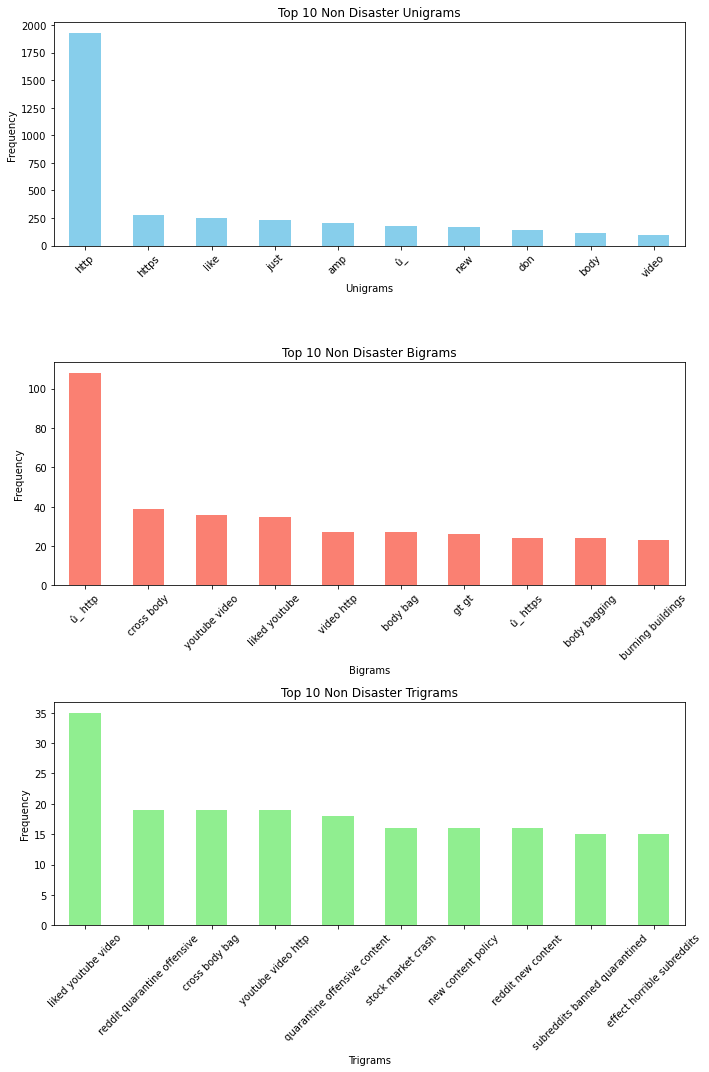

In [47]:


# Filter for non disaster tweets
non_disaster_tweets_df = df.train[df.train['target'] == 0]

# Get top 10 unigrams, bigrams, and trigrams
top_unigrams = get_top_ngrams(non_disaster_tweets_df, (1, 1))
top_bigrams = get_top_ngrams(non_disaster_tweets_df, (2, 2))
top_trigrams = get_top_ngrams(non_disaster_tweets_df, (3, 3))

# Print the results
print("Top 10 Non Disaster Unigrams:")
print(top_unigrams)
print("\nTop 10 Non Disaster Bigrams:")
print(top_bigrams)
print("\nTop 10 Non DisasterTrigrams:")
print(top_trigrams)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Unigrams
top_unigrams.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Non Disaster Unigrams')
axs[0].set_xlabel('Unigrams')
axs[0].set_ylabel('Frequency')
axs[0].set_xticklabels(top_unigrams.index, rotation=45)

# Bigrams
top_bigrams.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top 10 Non Disaster Bigrams')
axs[1].set_xlabel('Bigrams')
axs[1].set_ylabel('Frequency')
axs[1].set_xticklabels(top_bigrams.index, rotation=45)

# Trigrams
top_trigrams.plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Top 10 Non Disaster Trigrams')
axs[2].set_xlabel('Trigrams')
axs[2].set_ylabel('Frequency')
axs[2].set_xticklabels(top_trigrams.index, rotation=45)

plt.tight_layout()
plt.show()


### Keyword Frequency
Analyze the most frequent keywords for disaster and non-disaster tweets.

Top 10 Disaster Keywords:
[('derailment', 39), ('outbreak', 39), ('wreckage', 39), ('debris', 37), ('oil%20spill', 37), ('typhoon', 37), ('evacuated', 32), ('rescuers', 32), ('suicide%20bomb', 32), ('suicide%20bombing', 32)]

Top 10 Non-Disaster Keywords:
[('body%20bags', 40), ('armageddon', 37), ('harm', 37), ('deluge', 36), ('ruin', 36), ('wrecked', 36), ('explode', 35), ('fear', 35), ('siren', 35), ('twister', 35)]


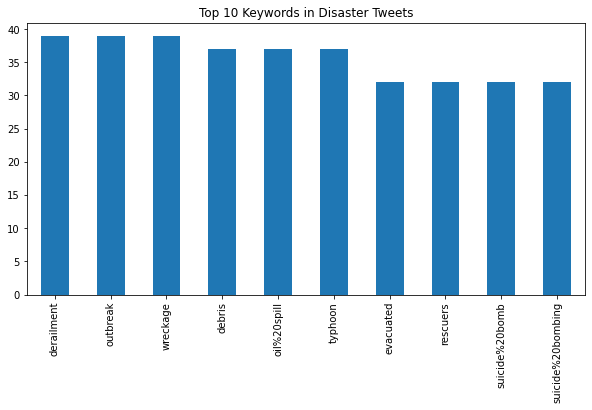

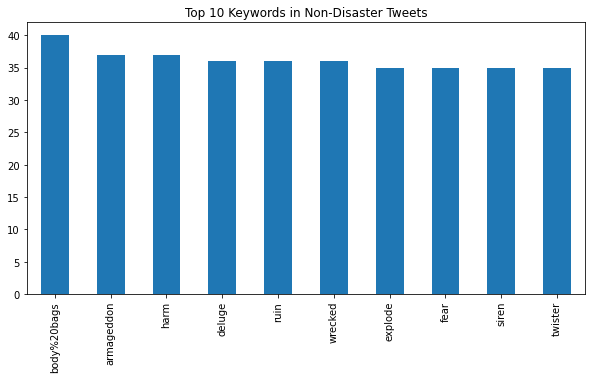

In [50]:
from collections import Counter

disaster_keywords = Counter(df.train[df.train['target'] == 1]['keyword'].dropna())
non_disaster_keywords = Counter(df.train[df.train['target'] == 0]['keyword'].dropna())

# Print the top 10 results
print("Top 10 Disaster Keywords:")
print(disaster_keywords.most_common(10))

print("\nTop 10 Non-Disaster Keywords:")
print(non_disaster_keywords.most_common(10))

# Plot the most common keywords for disaster tweets
plt.figure(figsize=(10,5))
pd.Series(disaster_keywords).nlargest(10).plot(kind='bar')
plt.title('Top 10 Keywords in Disaster Tweets')
plt.show()

# Plot the most common keywords for non-disaster tweets
plt.figure(figsize=(10,5))
pd.Series(non_disaster_keywords).nlargest(10).plot(kind='bar')
plt.title('Top 10 Keywords in Non-Disaster Tweets')
plt.show()


## Model and Training

### GRU Model


For this project, we will use a GRU-based neural network, which is known for efficiently processing sequences like text data.

#### Model Architecture
We will build a GRU-based neural network with the following structure:

Embedding layer: To convert tokens into dense vectors of fixed size.

GRU layer: To capture dependencies in the sequence.

Dense layer with sigmoid activation: For binary classification.

In [60]:
import pandas as pd
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply cleaning function to training and test data
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_text'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(X_train_sequences, maxlen=100, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=100, padding='post')

# Target variable (disaster or non-disaster)
y_train = train_data['target']

# Train-test split (for model validation purposes)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(GRU(units=128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


[nltk_data] Downloading package stopwords to C:\Users\Tanya
[nltk_data]     Shoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5


C:\Users\Tanya Shoma\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.5521 - loss: 0.6869 - val_accuracy: 0.5739 - val_loss: 0.6825
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.5691 - loss: 0.6850 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.5637 - loss: 0.6858 - val_accuracy: 0.5739 - val_loss: 0.6834
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.5728 - loss: 0.6849 - val_accuracy: 0.5739 - val_loss: 0.6825
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.5624 - loss: 0.6861 - val_accuracy: 0.5739 - val_loss: 0.6836
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5694 - loss: 0.6844
Validation Accuracy: 0.5739


## LSTM for Text classification

In [69]:
import pandas as pd
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply cleaning function to training and test data
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_text'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(X_train_sequences, maxlen=100, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=100, padding='post')

# Target variable (disaster or non-disaster)
y_train = train_data['target']

# Train-test split (for model validation purposes)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(units=128, return_sequences=False))  # Replaced GRU with LSTM
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


[nltk_data] Downloading package stopwords to C:\Users\Tanya
[nltk_data]     Shoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Tanya Shoma\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.5674 - loss: 0.6865 - val_accuracy: 0.5739 - val_loss: 0.6858
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.5657 - loss: 0.6859 - val_accuracy: 0.5739 - val_loss: 0.6823
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.5714 - loss: 0.6842 - val_accuracy: 0.5739 - val_loss: 0.6837
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.5632 - loss: 0.6857 - val_accuracy: 0.5739 - val_loss: 0.6829
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.5695 - loss: 0.6840 - val_accuracy: 0.5739 - val_loss: 0.6825
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5694 - loss: 0.6836
Validation Accuracy: 0.5739


The accuracy of the above GRU and LSTM model is around 0.57, which are not good perfromance. To improve the accuracy of our text classification model, we use Bidirectional LSTM to capture both forward and backward contexts of the text.

### Bidirectional LSTM

In [81]:
import pandas as pd
import re
import nltk
import numpy as np
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Download stopwords if necessary
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning function to training and test data
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_text'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])

# Pad sequences to ensure equal length
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Target variable (disaster or non-disaster)
y_train = train_data['target']

# Train-test split for model validation
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_val_pred))

# Prediction on test set
test_preds = (model.predict(X_test_padded) > 0.5).astype("int32")

# Prepare submission file
submission = pd.DataFrame({'id': test_data['id'], 'target': test_preds.flatten()})
submission.to_csv('submission.csv', index=False)



[nltk_data] Downloading package stopwords to C:\Users\Tanya
[nltk_data]     Shoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10


C:\Users\Tanya Shoma\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.6294 - loss: 0.6440 - val_accuracy: 0.7919 - val_loss: 0.4547
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.8637 - loss: 0.3250 - val_accuracy: 0.7951 - val_loss: 0.4817
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.9101 - loss: 0.2210 - val_accuracy: 0.7787 - val_loss: 0.5567
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9488 - loss: 0.1481 - val_accuracy: 0.7663 - val_loss: 0.6400
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7777 - loss: 0.4767
Validation Accuracy: 0.7919
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.78      0.72      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

102/102 ━━━━━━━━━━━━━━━━━━

## Results and Discussion

In this study, we evaluated various models for classifying tweets into disaster-related and non-disaster categories. The model architectures explored include GRU, LSTM, and Bidirectional LSTM. The initial implementations of GRU and LSTM resulted in relatively low accuracy, approximately 0.57. However, upon transitioning to a Bidirectional LSTM model, we observed a significant improvement in performance, achieving an accuracy of 0.79.

The classification report reveals the precision, recall, and F1-scores for both classes:

| Class                      | Precision | Recall | F1-Score |
|----------------------------|-----------|--------|----------|
| Non-Disaster (Class 0)     | 0.80      | 0.85   | 0.82     |
| Disaster (Class 1)         | 0.78      | 0.72   | 0.75     |


The precision score indicates that when the model predicts a tweet as non-disaster, it is correct 80% of the time. The recall score of 85% for class 0 suggests that the model successfully identifies 85% of actual non-disaster tweets. For class 1, while the precision is slightly lower at 78%, the recall is 72%, indicating that the model could improve in identifying disaster-related tweets.

The weighted average F1-score of 0.79 reflects a balanced performance across both classes, reinforcing that the Bidirectional LSTM model effectively captures the nuances in the dataset. The improvement in accuracy with the Bidirectional LSTM can be attributed to its ability to learn from the context of words both before and after a given token, allowing for a more comprehensive understanding of the tweet content.

## Conclusion

In this project, we first built a GRU-based neural network to classify disaster-related tweets. The GRU model was chosen due to its efficiency in processing short sequences, like tweets. After conducting exploratory data analysis, we preprocessed the text data, tokenized it, and padded sequences to make them uniform. The GRU model demonstrated weak performance in classifying tweets, as evident from the validation results. Since the GRU model had low accuracy, we build a LSTM model for the text classification, however the LSTM model did not improve the classification performance compared to GRU. To futher improve the classification perforance we applied bidirectional LSTM which significantly improve the classification performance of disaster-related tweets compared to simpler models like GRU and standard LSTM. The achieved accuracy of 0.79, along with robust precision and recall metrics, leverage the effectiveness of using deep learning techniques in natural language processing tasks.

Future work could continue to boost the classification performance.  hyperparameter tuning and data augmentation are good step for a better performance. Additionally, experimenting with transformer-based models, such as BERT, could also be beneficial in capturing the contextual intricacies of the data.
